<a href="https://colab.research.google.com/github/faisal-rasheed-lone/Neural-Networks-And-Deep-Learning/blob/master/Binary_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-07 12:27:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.250.4.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.0MB/s    in 5.9s    

2023-10-07 12:27:23 (17.6 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (382, 512, 3)
Image shape: (512, 512, 3)


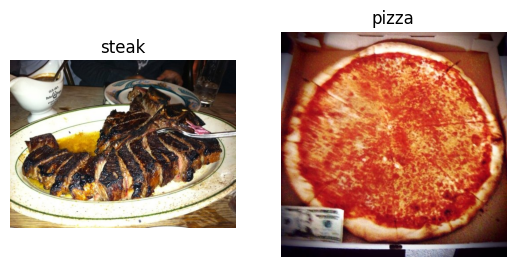

In [3]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Define data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for the validation/test set

# Define paths to your train and test data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [6]:
# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification
])


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,  # Increase the number of epochs as needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/15
46/46 [==============================] - 24s 257ms/step - loss: 0.7849 - accuracy: 0.5749 - val_loss: 0.5468 - val_accuracy: 0.7354
Epoch 2/15
46/46 [==============================] - 13s 279ms/step - loss: 0.5514 - accuracy: 0.7350 - val_loss: 0.4098 - val_accuracy: 0.8479
Epoch 3/15
46/46 [==============================] - 12s 255ms/step - loss: 0.4886 - accuracy: 0.7657 - val_loss: 0.3456 - val_accuracy: 0.8562
Epoch 4/15
46/46 [==============================] - 12s 257ms/step - loss: 0.4374 - accuracy: 0.8025 - val_loss: 0.3113 - val_accuracy: 0.8771
Epoch 5/15
46/46 [==============================] - 12s 259ms/step - loss: 0.4462 - accuracy: 0.8018 - val_loss: 0.3029 - val_accuracy: 0.8687
Epoch 6/15
46/46 [==============================] - 13s 283ms/step - loss: 0.4228 - accuracy: 0.8127 - val_loss: 0.2924 - val_accuracy: 0.8813
Epoch 7/15
46/46 [==============================] - 12s 258ms/step - loss: 0.4045 - accuracy: 0.8181 - val_loss: 0.2857 - val_accuracy: 0.8729

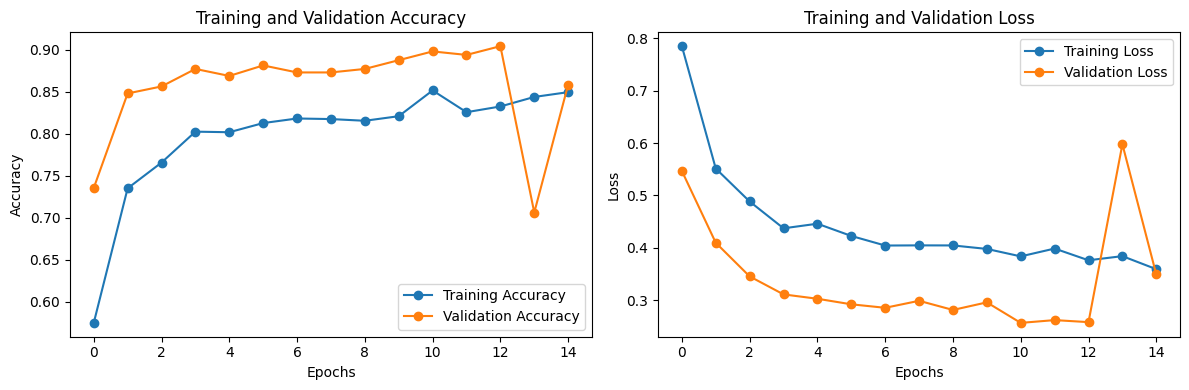

In [10]:
import matplotlib.pyplot as plt

# Get the training history
history_dict = history.history

# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss', marker='o')
plt.plot(history_dict['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


16/16 - 2s - loss: 0.3466 - accuracy: 0.8580 - 2s/epoch - 105ms/step
Test accuracy: 85.80%
16/16 [==============================] - 1s 64ms/step


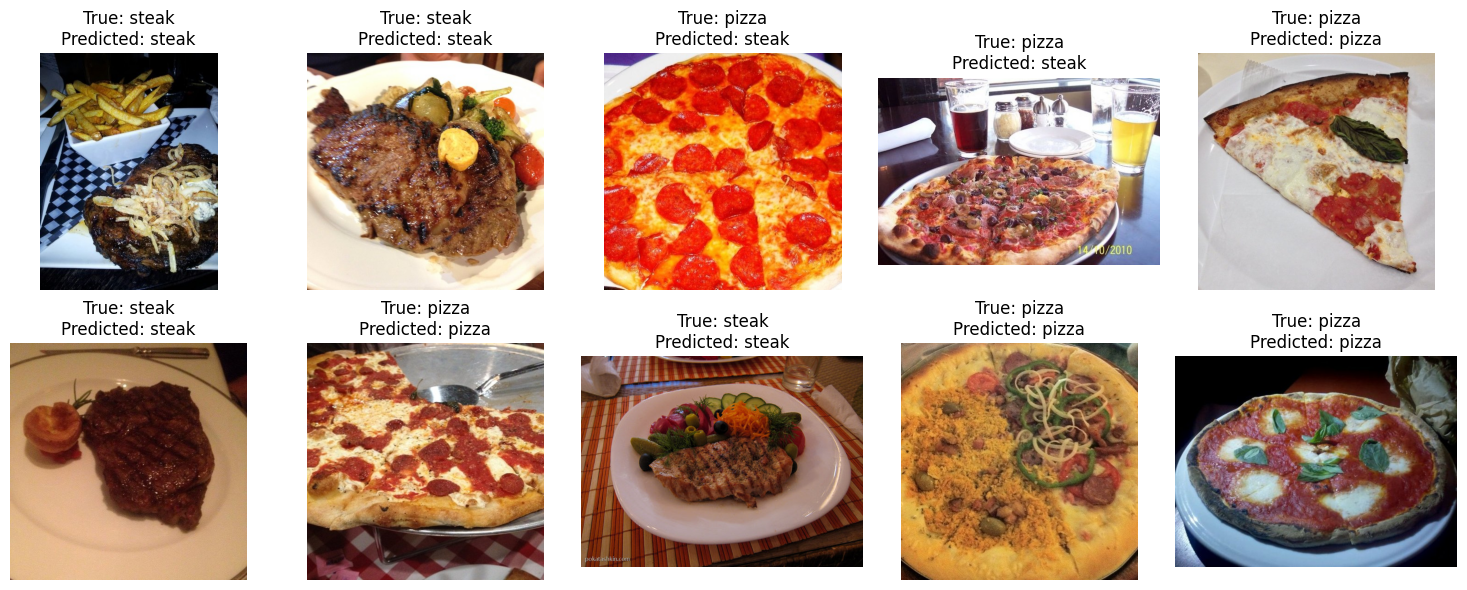

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

# Predict labels for the test data
test_predictions = model.predict(test_generator)

# Get true labels
true_labels = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Display a random subset of test images along with true and predicted labels
num_images_to_display = 10  # Adjust as needed

random_indices = np.random.choice(len(test_predictions), size=num_images_to_display, replace=False)
fig, axes = plt.subplots(2, num_images_to_display // 2, figsize=(15, 6))

for i, ax in enumerate(axes.ravel()):
    index = random_indices[i]
    ax.imshow(plt.imread(test_generator.filepaths[index]))
    ax.set_title(f'True: {class_labels[true_labels[index]]}\nPredicted: {class_labels[int(round(test_predictions[index][0]))]}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [22]:
model.save("pizza_steak_model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
from google.colab import files

# Download the saved model to your local directory
files.download("pizza_steak_model1.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model Two - Improving the above mode

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for the validation/test set

# Define paths to your train and test data directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), # changing it to 224 from 150
    batch_size=32,
    class_mode='binary'  # Binary classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # Binary classification
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
# Create a CNN model with dropout
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),  # Add dropout layer to reduce overfitting

    Dense(1, activation='sigmoid')  # Binary classification
])

In [17]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,  # Increase the number of epochs as needed
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping]  # Apply early stopping
)

Epoch 1/50
46/46 [==============================] - 29s 520ms/step - loss: 0.6891 - accuracy: 0.6451 - val_loss: 0.3708 - val_accuracy: 0.8521
Epoch 2/50
46/46 [==============================] - 23s 492ms/step - loss: 0.4945 - accuracy: 0.7602 - val_loss: 0.3579 - val_accuracy: 0.8625
Epoch 3/50
46/46 [==============================] - 22s 469ms/step - loss: 0.4631 - accuracy: 0.7916 - val_loss: 0.2962 - val_accuracy: 0.8854
Epoch 4/50
46/46 [==============================] - 23s 502ms/step - loss: 0.4399 - accuracy: 0.7977 - val_loss: 0.2736 - val_accuracy: 0.8813
Epoch 5/50
46/46 [==============================] - 20s 437ms/step - loss: 0.4189 - accuracy: 0.8229 - val_loss: 0.3242 - val_accuracy: 0.8604
Epoch 6/50
46/46 [==============================] - 21s 457ms/step - loss: 0.3881 - accuracy: 0.8311 - val_loss: 0.2959 - val_accuracy: 0.8854
Epoch 7/50
46/46 [==============================] - 22s 486ms/step - loss: 0.3947 - accuracy: 0.8324 - val_loss: 0.3543 - val_accuracy: 0.8417

In [19]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

16/16 - 2s - loss: 0.4056 - accuracy: 0.8220 - 2s/epoch - 99ms/step
Test accuracy: 82.20%


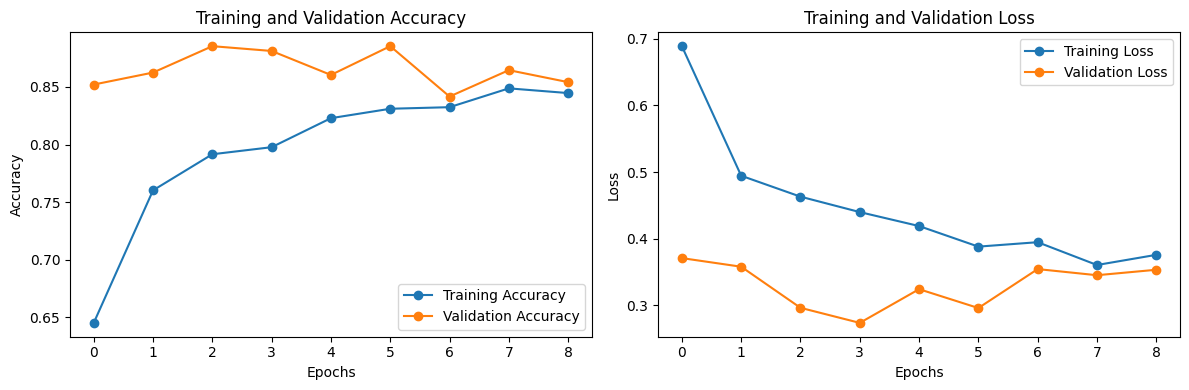

In [20]:
import matplotlib.pyplot as plt

# Get the training history
history_dict = history.history

# Plot training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Training Loss', marker='o')
plt.plot(history_dict['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


16/16 [==============================] - 1s 78ms/step


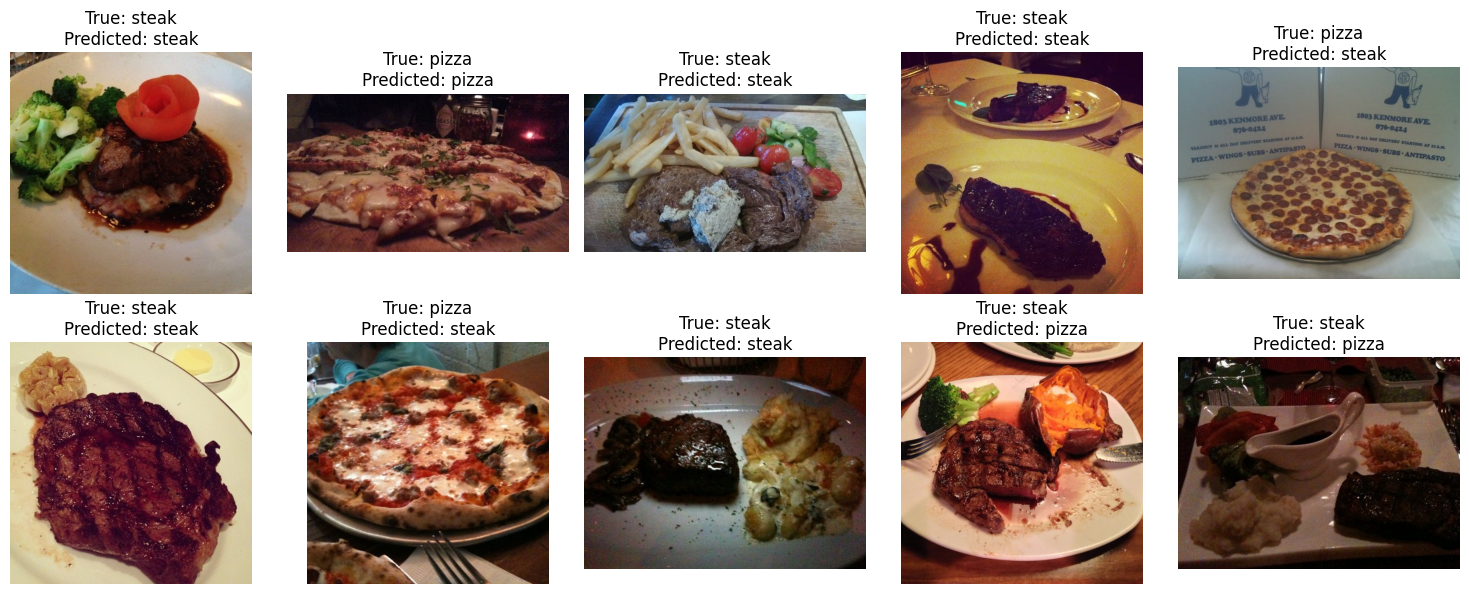

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels for the test data
test_predictions = model.predict(test_generator)

# Get true labels
true_labels = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Display a random subset of test images along with true and predicted labels
num_images_to_display = 10  # Adjust as needed

random_indices = np.random.choice(len(test_predictions), size=num_images_to_display, replace=False)
fig, axes = plt.subplots(2, num_images_to_display // 2, figsize=(15, 6))

for i, ax in enumerate(axes.ravel()):
    index = random_indices[i]
    ax.imshow(plt.imread(test_generator.filepaths[index]))
    ax.set_title(f'True: {class_labels[true_labels[index]]}\nPredicted: {class_labels[int(round(test_predictions[index][0]))]}')
    ax.axis('off')

plt.tight_layout()
plt.show()
